<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 수치예측 - 자전거 대여 수요

---

아래는 날짜별로 자전거 대여 수요에 대한 데이터이다.
- 날짜별로 자전거 대여 수요(count)를 예측하는 모델을 구성하시오.

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/bike.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# Visual Python: Data Analysis > Data Info
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
datetime,0,10886
season,0,10886
holiday,0,10886
workingday,0,10886
weather,0,10886
temp,0,10886
atemp,0,10886
humidity,0,10886
windspeed,0,10886
casual,0,10886


#### 날짜 타입 데이터 생성

In [6]:
# Visual Python: Data Analysis > Frame
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,2,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,2,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,2,22


#### 컬럼 삭제

In [7]:
# Visual Python: Data Analysis > Frame
df.drop(['datetime','casual','registered'], axis=1, inplace=True)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,2,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,2,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,2,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,2,22


#### 수치형 컬럼: Min-Max Scaling

In [8]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Prep
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# [2] Fit
scaler.fit(df[['temp', 'atemp', 'humidity', 'windspeed']])

# [3] Transform
trans = scaler.transform(df[['temp', 'atemp', 'humidity', 'windspeed']])

In [9]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']

df[cols] = trans

#### count 예측

R squared: 0.9496433269182849
MAE: 24.596792799412196
RMSE: 40.51849528020786


### Regression plot

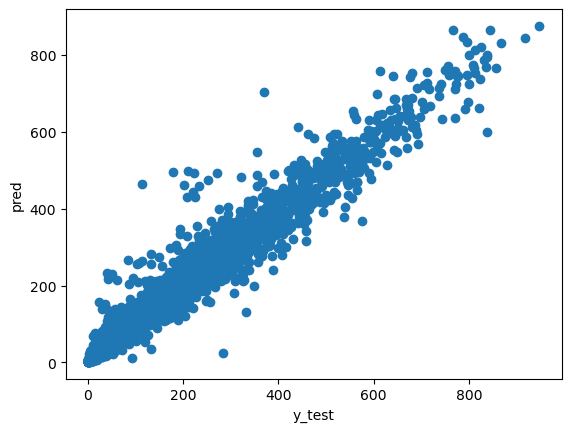

In [10]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek', 'hour']], df['count'])

# [2] Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# R squared
print('R squared: {}'.format(metrics.r2_score(y_test, pred)))
# MAE(Mean Absolute Error)
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))
# RMSE(Root Mean Squared Error)
print('RMSE: {}'.format(metrics.mean_squared_error(y_test, pred)**0.5))
# Regression plot
display(Markdown('### Regression plot'))
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

In [11]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

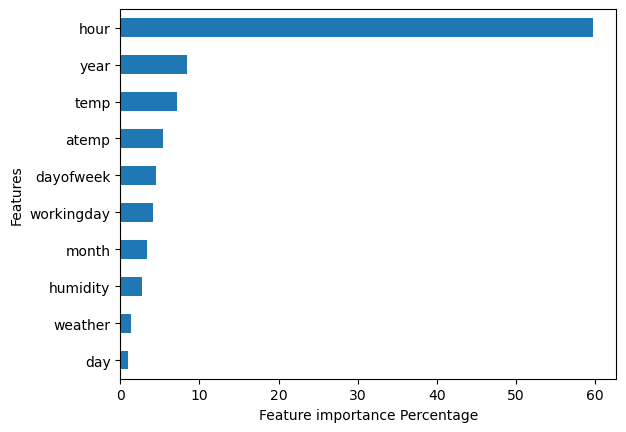

In [12]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True, top_count=10)

---

In [13]:
# End of file